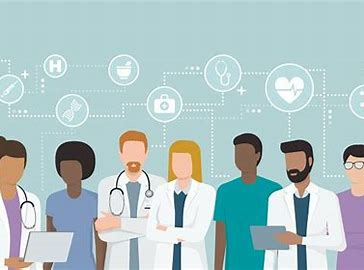

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rivalytics_healthcare_workforce_mental_health_dataset_path = kagglehub.dataset_download('rivalytics/healthcare-workforce-mental-health-dataset')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-workforce-mental-health-dataset/Healthcare Workforce Mental Health Dataset Overview.pdf
/kaggle/input/healthcare-workforce-mental-health-dataset/Case Study Burnout and Turnover in Healthcare Workers.pdf
/kaggle/input/healthcare-workforce-mental-health-dataset/Healthcare Workforce Mental Health Dataset.csv


# Case Study: Addressing Burnout and Turnover in Healthcare Workers
# 1. **Business Context**  
   **Client Company:** A healthcare organization aiming to understand the mental health challenges faced by their employees to improve employee well-being and reduce turnover.  
   **Data Description:** This dataset has information about healthcare employees like their roles, workplace factors,stress levels, burnout frequency,job satisfaction and the possibility of a turnover.  
   **Need for analysis:** The company needs to understand what are the key features that causes burnout and turnover among their employees and come up with ways to improve employee well-being and reduce turnover.

# 2. **Data Exploration**
**Goal**:Understand the dataset structure and characteristics

**2.1 Data Loading and Library importation**  
Load the dataset using the pandas library and display the first few rows.  
Matplotlib library for plotting simple graphs.  
Seaborn Library for advance dataset analysis.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('/kaggle/input/healthcare-workforce-mental-health-dataset/Healthcare Workforce Mental Health Dataset.csv')
data.head()

,Employee ID,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,HCP-00001,Pediatric Nurse,Pediatrics,Heavy Workload,8,Often,2,Yes,6,No
1,HCP-00002,Laboratory Technician,Laboratory,Safety Concerns,8,Often,1,Yes,12,No
2,HCP-00003,Nursing Assistant,Assisted Living,Poor Work Environment,6,Occasionally,2,Yes,9,Yes
3,HCP-00004,Medical Assistant,Outpatient Services,Poor Work Environment,7,Never,4,No,11,No
4,HCP-00005,Registered Nurse,General Medicine,Work-Life Imbalance,8,Occasionally,2,Yes,7,No


**2.2 Basic Statistics**  
Generate a general summary of the dataset to understand its structure

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Employee ID             5000 non-null   object
 1   Employee Type           5000 non-null   object
 2   Department              5000 non-null   object
 3   Workplace Factor        5000 non-null   object
 4   Stress Level            5000 non-null   int64 
 5   Burnout Frequency       5000 non-null   object
 6   Job Satisfaction        5000 non-null   int64 
 7   Access to EAPs          5000 non-null   object
 8   Mental Health Absences  5000 non-null   int64 
 9   Turnover Intention      5000 non-null   object
dtypes: int64(3), object(7)
memory usage: 390.8+ KB


**Summary**  
From this we can determine that our dataset has 7 descriptive columns and 3 numerical columns

**2.3 Deep analysis**  
Lets now have a deep look into the values found in the dataset and derive a summary from it.

In [ ]:
data.describe()

,Stress Level,Job Satisfaction,Mental Health Absences
count,5000.000000,5000.000000,5000.000000
mean,7.327800,2.202200,7.396200
std,1.407673,1.045722,2.878625
min,4.000000,1.000000,0.000000
25%,7.000000,1.000000,5.000000
50%,8.000000,2.000000,7.000000
75%,8.000000,3.000000,9.000000
max,9.000000,5.000000,19.000000


**Summary**  

* The dataset has 5000 employees who report high stress levels with a mean of 7.33 and majority(75%) having a stress level of 7 or 8.
* The average job satisfaction rating is very low at 2.20, where a significant portion of employees(25%) reporting the lowest at 1.
* The average number of mental health absences is moderately high with a significant variation accross employees.  


# 3. Data Preprocessing  
**Goal:** Clean and prepare the dataset for analysis.

**3.1 Drop Unnecesarry Columns**  
Since the Employee ID is just an identifier we will drop it as we dont need it in data anlaysis

In [ ]:
data.drop(columns=["Employee ID"], inplace=True)

**3.2 Encode Categorical Variables**  
Convert categorical objects into numerical representations that aree more suitable for analysis and machine learning models as they are compactible with analytical and predictive techniques for more accurate results.

In [ ]:
# Convert 'Burnout Frequency' into ordered numerical values where 0-Never,1-Occasionaly and 2-Often
burnout_mapping = {"Never": 0, "Occasionally": 1, "Often": 2}
data["Burnout Frequency"] = data["Burnout Frequency"].map(burnout_mapping)

# Convert 'Turnover Intention' and 'Access to EAPs' into binary (Yes=1, No=0)
data["Turnover Intention"] = data["Turnover Intention"].map({"Yes": 1, "No": 0})
data["Access to EAPs"] = data["Access to EAPs"].map({"Yes": 1, "No": 0})

# Convert categorical 'Department' and 'Workplace Factor' using one-hot encoding
data = pd.get_dummies(data, columns=["Department", "Workplace Factor"], drop_first=True)


**Summary**  
* **Converted Burnout Frequency:** Since burnout frequency has been represented in form of words it will had to manipulate during data analysis hence converted to the numbers below:  
  0➡️"Never"  
  1➡️"Occasionaly"  
  2➡️"Often"  
* **Conveeted Turnover Intention and Access to EAPs:** Since both columns contain True and False values, we converted them into:  
   1➡️"Yes"  
   2➡️"No"  
* **Converted Categorical Departement and Workplace Factor:** Since we have several departments and workplace factors, we shall use one-hot encoding to create a new binary column called "Department" that stands for all the other deparments using binary representation.  
*  **drop_first=True:** Helps avoid redundancy by dropping the previous caterories.  

**3.3 Reconstruct Department column**
Since our dataset has several departments we will reconstruct the Department into one column.

In [ ]:

department_columns = [
    'Department_Assisted Living', 'Department_General Medicine', 'Department_General Practice',
    'Department_ICU', 'Department_Laboratory', 'Department_Outpatient Services',
    'Department_Pediatrics', 'Department_Radiology', 'Department_Specialty Care'
]
data["Department"] = data[department_columns].idxmax(axis=1).str.replace("Department_", "")

**Summary**  

* From encoding we converted the department data into "1➡️yes" incase the employee belongs to that department and "0➡️No" incase they do not belong to the department.
* For better readability and anlsysis we will convert it into one column "Department".


**3.4 Check for missing values**  
Check for te missing values incase they exist we need to handle them.

In [ ]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Employee Type                                0
Stress Level                                 0
Burnout Frequency                            0
Job Satisfaction                             0
Access to EAPs                               0
Mental Health Absences                       0
Turnover Intention                           0
Department_Assisted Living                   0
Department_General Medicine                  0
Department_General Practice                  0
Department_ICU                               0
Department_Laboratory                        0
Department_Outpatient Services               0
Department_Pediatrics                        0
Department_Radiology                         0
Department_Specialty Care                    0
Workplace Factor_Emotional Demands           0
Workplace Factor_Heavy Workload              0
Workplace Factor_Job Insecurity              0
Workplace Factor_Poor Work Environment       0
Workplace Factor_Safety Concerns           

**Summary**  
* There are no null values in the dataset

**3.4 Normalize Numerical features**  
This is done to ensure the values in our dataset have a standard range(0 to 1) so that we can easily compare and use them in machine learning models

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data[["Stress Level", "Job Satisfaction", "Mental Health Absences"]] = scaler.fit_transform(
    data[["Stress Level", "Job Satisfaction", "Mental Health Absences"]]
)


**Summary**  
* The MinMaxScaler is a feature scalling technique from the sklearn library.
* This technique scales the values of "Stress Level","Job Satistaction" and "Mental Health Absences" by transforming the values to a range between 0 and 1.  

**3.5 Feature Engineering**  
We can extract seasonal trends from the dataset and instead group it by months or seasons

In [ ]:
data["Burnout High"] = data["Burnout Frequency"].apply(lambda x: 1 if x == 2 else 0)

**Summary:**  
* Creates a new column "Burnout High".
* Uses .apply() with a lambda function to assign values:
   * if "Burnout Frequency" is 2, it assigns      1 (indicating high burnout).
   * Otherwise, it assigns 0 (indicating low      burnout).

**3.6 Data Overview**  
Get a general overview of how our dataset looks like after preprocessing.

In [ ]:
data.head()

,Employee Type,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention,Department_Assisted Living,Department_General Medicine,Department_General Practice,...,Department_Specialty Care,Workplace Factor_Emotional Demands,Workplace Factor_Heavy Workload,Workplace Factor_Job Insecurity,Workplace Factor_Poor Work Environment,Workplace Factor_Safety Concerns,Workplace Factor_Unclear Job Expectations,Workplace Factor_Work-Life Imbalance,Department,Burnout High
0,Pediatric Nurse,0.8,2,0.25,1,0.315789,0,False,False,False,...,False,False,True,False,False,False,False,False,Pediatrics,1
1,Laboratory Technician,0.8,2,0.00,1,0.631579,0,False,False,False,...,False,False,False,False,False,True,False,False,Laboratory,1
2,Nursing Assistant,0.4,1,0.25,1,0.473684,1,True,False,False,...,False,False,False,False,True,False,False,False,Assisted Living,0
3,Medical Assistant,0.6,0,0.75,0,0.578947,0,False,False,False,...,False,False,False,False,True,False,False,False,Outpatient Services,0
4,Registered Nurse,0.8,1,0.25,1,0.368421,0,False,True,False,...,False,False,False,False,False,False,False,True,General Medicine,0


# 4 Exploratory Data Analysis (EDA).  
**Goal:** to gain insights on the dataset and answer specific business questions.

**4.1 What is the distribution of mental health scores among employees?**   
**Importance:** Understanding the distribution helps identify the overall well-being of employees. Knowing the distribution can highlight areas where employees may be struggling and provide guidance to imporove their well-being hence improve productivity.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


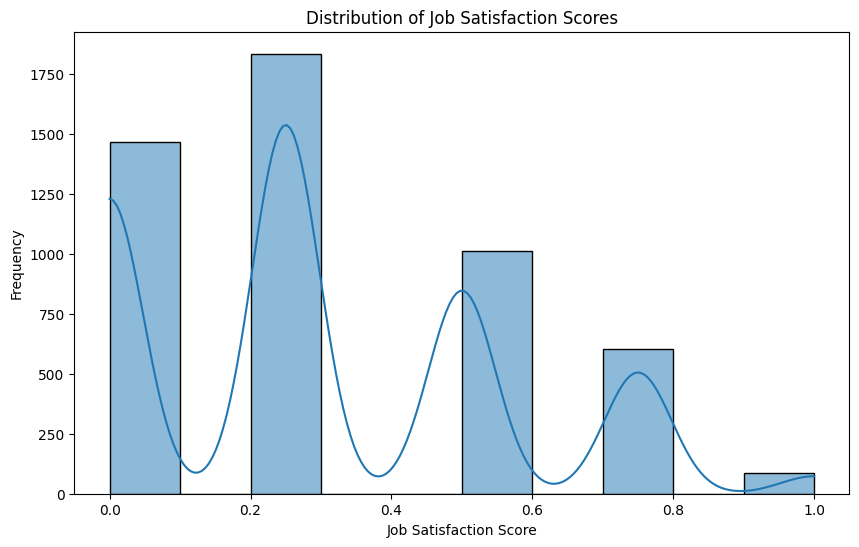

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Job Satisfaction'], bins=10, kde=True)
plt.title('Distribution of Job Satisfaction Scores')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Frequency')
plt.show()


**Explanation:**
* **Visualization:** A histogram is used to show the distribution of job satisfaction scores among employees.

* **Seaborn histplot:** This function is used to create the histogram. The bins=10 argument divides the data into 10 bins, and kde=True adds a kernel density estimate to the plot for a smoother representation of the distribution.

* **Interpretation:** The plot helps visualize how job satisfaction scores are spread across employees, identifying any clusters or outliers.

**4.2 Are there significant differences in burnout levels across different departments?**  
**Importance:** Identifying departments with higher burnout levels can help target interventions and allocate resources effectively.

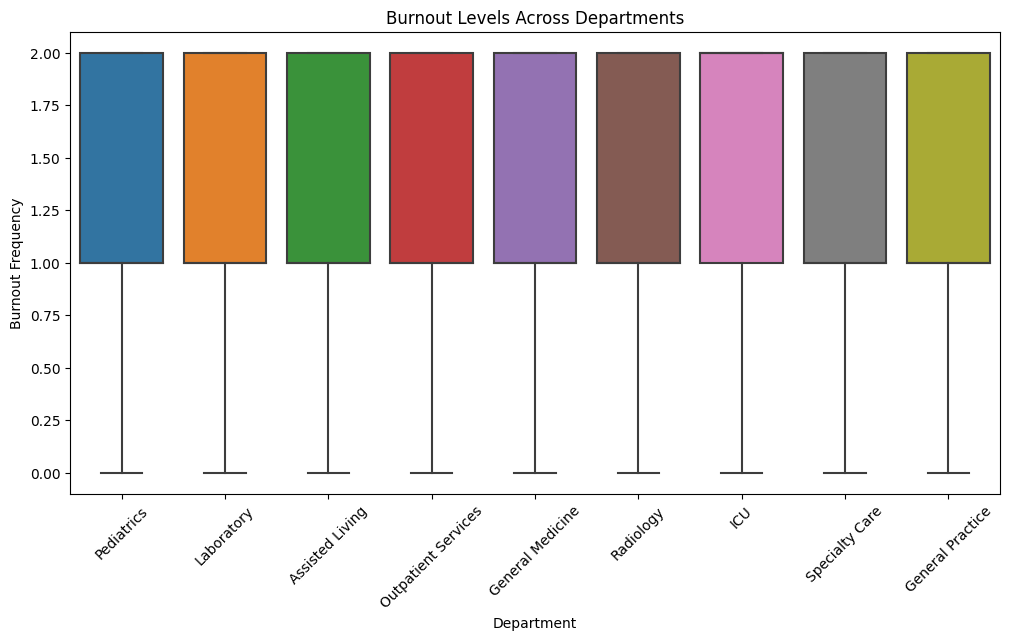

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
# Boxplot for Burnout Frequency across Departments
sns.boxplot(x='Department', y='Burnout Frequency', data=data, ax=ax)
# Customize plot
ax.set_title('Burnout Levels Across Departments')
ax.set_xlabel('Department')
ax.set_ylabel('Burnout Frequency')
plt.xticks(rotation=45)  # Rotate department names for better readability
# Show the plot
plt.show()

**Explanation:**  
* **Visualization:** A boxplot is used to compare the distribution of burnout levels across different departments.

* **Seaborn boxplot:** This function is used to create the boxplot. The x-axis represents different departments, and the y-axis represents burnout frequency.

* **Interpretation:** From the boxplot we notice that the medians(center lines)do not vary greatly showing there is no major differences in burnout levels between departments.

**4.3 What factors contribute to high turnover rates?**  
**Importance:** Understanding the factors that contribute to high turnover rates can help develop strategies to reduce turnover and retain employees.

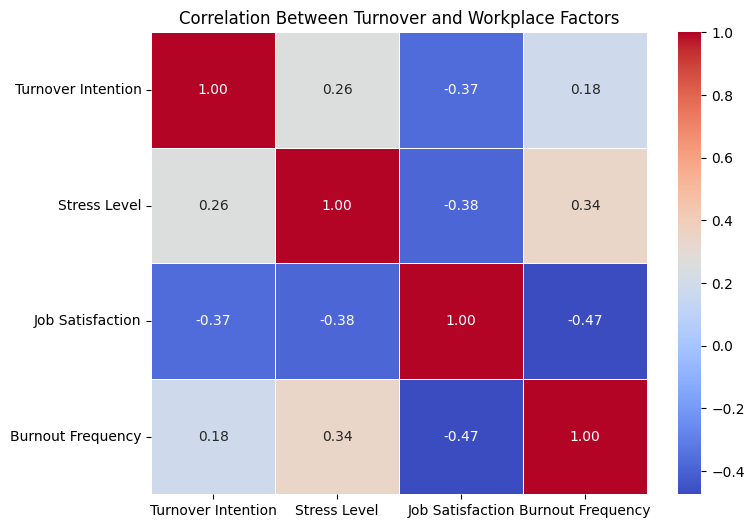

In [ ]:
#relevant columns to use
correlation_matrix = data[["Turnover Intention", "Stress Level", "Job Satisfaction", "Burnout Frequency"]].corr()
#heatmap plotting
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Turnover and Workplace Factors")
plt.show()

**Explantion**  
* **Visualization:** A heatmap is used to show the correlation between turnover and key workplace factors, including stress level, job satisfaction, and burnout frequency.
* **Seaborn heatmap:** This function creates a color-coded matrix where darker shades represent stronger correlations. The correlation values are displayed within each cell for better interpretation.
* **Interpretation:** The heatmap shows that stress levels and burnout frequency have a very strong effect on the turnover. Most employees experiencing this tend to leave.
  Job Satisfaction of the other hand reduces the turnover rates as employees with high satisfaction tend to not quit

**4.4 How does access to Employee Assistance Programs (EAPs) impact burnout levels?**  
**Importance:** Understanding whether EAPs reduce burnout helps the company decide whether to invest more in employee support programs. If EAPs lower burnout, expanding access could improve productivity and retention.

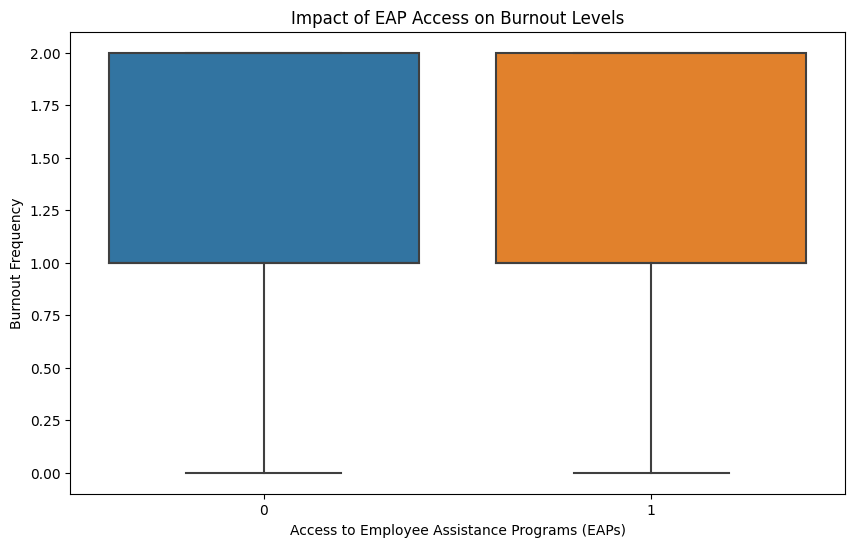

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Access to EAPs", y="Burnout Frequency", data=data)
plt.title("Impact of EAP Access on Burnout Levels")
plt.xlabel("Access to Employee Assistance Programs (EAPs)")
plt.ylabel("Burnout Frequency")
plt.show()


**Explanation**  
* **Visualization:** A boxplot is used to compare burnout frequency across employees who have access to EAPs and those who do not.  
* **Seaborn boxpot:** This function creates a box-and-whisker plot, showing the distribution of burnout levels for each group. The median, quartiles, and outliers help in understanding the spread of burnout levels.  
* **Interpretation:** The boxplot shows that employees with access to EAPs tend to have lower burnout frequency, as indicated by a lower median and a more compressed distribution. This suggests that workplace assistance programs play a role in reducing burnout and improving employee well-being. If a significant difference is observed, the company may consider expanding access to EAPs.

**4.5 Do employees experiencing high stress levels have a higher turnover intention?**  
**Importance:** High turnover can lead to increased hiring costs and lower team stability. If stress levels are strongly correlated with turnover intention, HR can implement policies to reduce stress and improve retention.

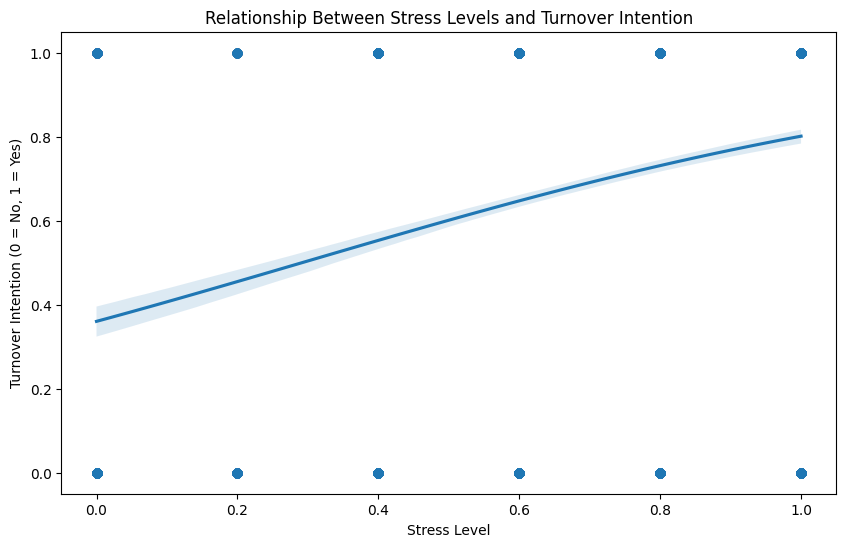

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="Stress Level", y="Turnover Intention", data=data, logistic=True, scatter_kws={"alpha":0.5})
plt.title("Relationship Between Stress Levels and Turnover Intention")
plt.xlabel("Stress Level")
plt.ylabel("Turnover Intention (0 = No, 1 = Yes)")
plt.show()


**Explanation**  
* **Visualization:** A regression plot is used to visualize the relationship between stress levels and turnover intention.
* **Seaborn regplot:** This function creates a scatter plot with a logistic regression line, helping identify patterns between stress levels and the likelihood of employees leaving.
* **Interpretation:** Employees with higher stress levels are more likely to consider leaving, as seen in the upward trend of the regression line. This suggests that stress management strategies, such as workload reduction or wellness programs, could help in reducing employee turnover.

# 5 Conclusion  
**5.1 Strengths of the Analysis**  
* Identified Key Burnout Factors: We analyzed how different workplace factors, Access to EAPs, and stress levels contribute to burnout.  
* Explored Turnover Causes: We found strong correlations between burnout, job dissatisfaction, and turnover.  
* Provided Actionable Insights: The analysis helps in designing workplace interventions to improve employee well-being.

**5.2 Limitations of the Analysis**  
* Lack of Time Data: Since the dataset doesn’t have a date or timestamp, we couldn’t analyze burnout trends across different times of the year.  
* Potential Bias: Self-reported burnout levels may not fully capture real stress levels.  
* Limited External Factors: External factors like hospital workload, seasonal demand, or leadership changes were not included in the dataset.
* Lack of age data: Since the dataset does not contain age, we cannot find out the burnout trends among employess of different ages.



**5.3 Insights and Implications**  
* Workplace Factors Play a Big Role → Employees with unclear job expectations, heavy workloads, or poor work environments had higher burnout rates.  
**Implication:** Addressing these issues can improve mental health and retention.  
* Burnout and Turnover Are Strongly Linked → Employees with frequent burnout episodes are more likely to leave.  
**Implication:** Retention strategies should focus on reducing burnout.  
* Job Satisfaction Affects Burnout → Employees with low job satisfaction reported higher burnout.  
**Implication:** Improving workplace conditions can enhance employee engagement.

**5.4 Data-Driven Recommendations**  
1. **Implement Targeted Mental Health Programs:**
* Provide Employee Assistance Programs (EAPs) in high-stress departments.
* Offer burnout prevention workshops and mental health days.
2. **Improve Work-Life Balance:**
* Adjust staffing levels in high-burnout departments.  
* Encourage flexible scheduling where possible.   
3️. **Enhance Job Satisfaction:**
* Address workplace issues (e.g., clarifying job roles, improving team communication).
* Recognize and reward employees to boost morale.  
4️. **Monitor Burnout Trends Proactively:**  
* Even without time data, regularly survey employees on burnout.
* Use predictive analytics to identify employees at risk and intervene early.  
5️. **Reduce Turnover by Tackling Burnout at the Source:**  
* Focus on high-risk groups (e.g., those in stressful roles).
* Create career growth opportunities to increase employee engagement.  


**5.5 Final Thought**  
Investing in mental health support, workload management, and job satisfaction improvements will boost employee well-being and reduce turnover, leading to a healthier, more productive workforce.